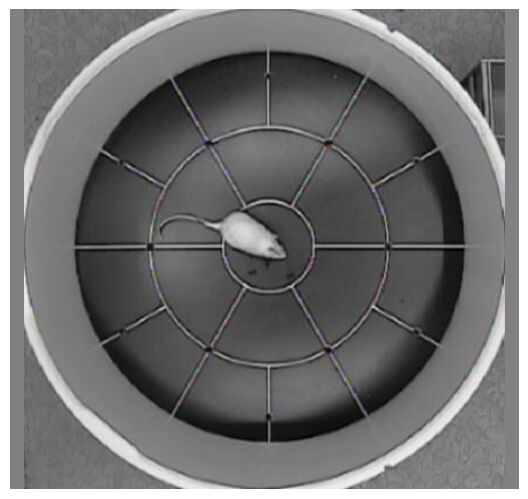

In [56]:
from PIL import Image
import matplotlib.pyplot as plt

pic = Image.open(f"/home/student1/PatternsDetection/Segmentation/20230904_segm_rat_OFT_gray_back/20230904_segm_rat_OFT_gray_back/val/images/OFT_control_01$000152&03_@004271.bmp")
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(pic)
plt.savefig("images/filters/1_original.jpg", dpi=300)

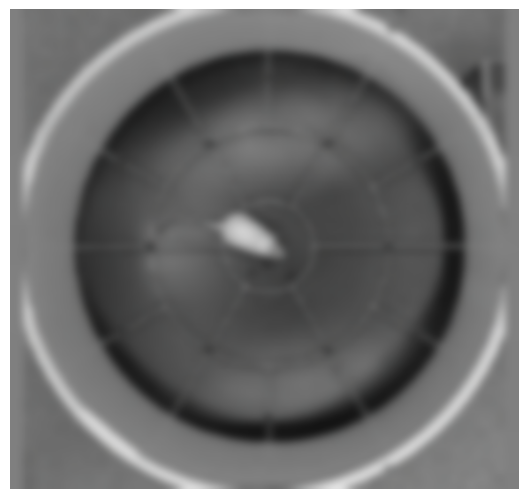

In [57]:
from scipy import ndimage

gauss_blur = ndimage.gaussian_filter(pic, 5)
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(gauss_blur)
plt.savefig("images/filters/2_gauss_blur.jpg", dpi=300)

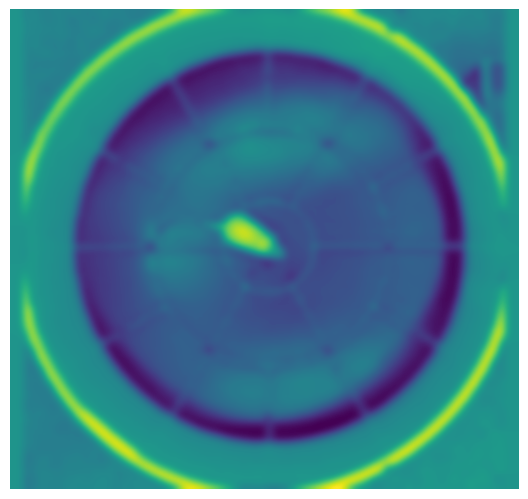

In [58]:
import numpy as np

gauss_blur_2 = Image.fromarray(np.uint8(gauss_blur)).convert('L')
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(gauss_blur_2)
plt.savefig("images/filters/3_gauss_blur_2.jpg", dpi=300)

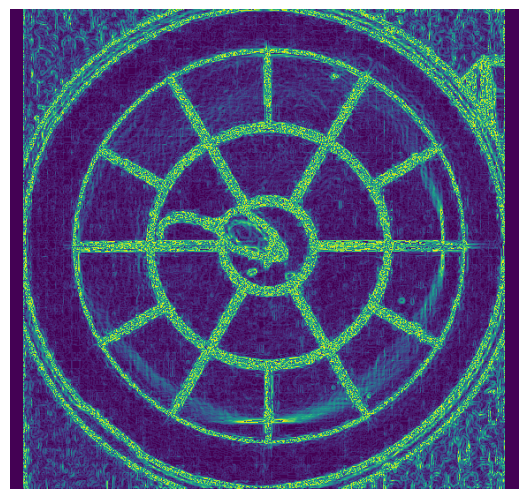

In [59]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])

pix = pic.convert("L")
vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
roberts = Image.fromarray(np.uint8(edged_img))

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(roberts)
plt.savefig("images/filters/4_roberts.jpg", dpi=300)

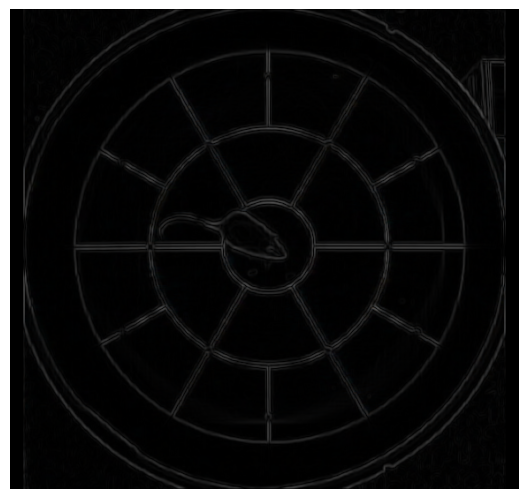

In [60]:
import skimage

pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
prewitt = skimage.filters.prewitt(pix)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(prewitt)
plt.savefig("images/filters/5_prewitt.jpg", dpi=300)

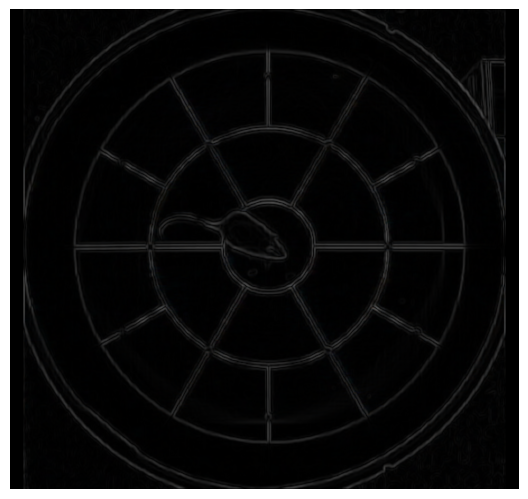

In [61]:
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
sobel = skimage.filters.sobel(pix)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(sobel, cmap=plt.cm.gray, aspect='equal', interpolation="mitchell")
plt.savefig("images/filters/6_sobel.jpg", dpi=300)

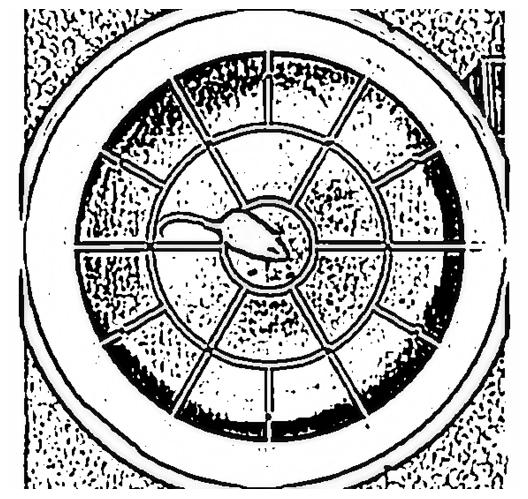

In [62]:
import cv2

def LoG_filter(image, sigma, size=None):
    # ядро LoG
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

pic_gray = cv2.imread("/home/student1/PatternsDetection/Segmentation/20230904_segm_rat_OFT_gray_back/20230904_segm_rat_OFT_gray_back/val/images/OFT_control_01$000152&03_@004271.bmp", cv2.IMREAD_GRAYSCALE)
laplas = LoG_filter(pic_gray, 2)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(laplas, cmap=plt.cm.gray, interpolation="mitchell")
plt.savefig("images/filters/7_laplas.jpg", dpi=300)

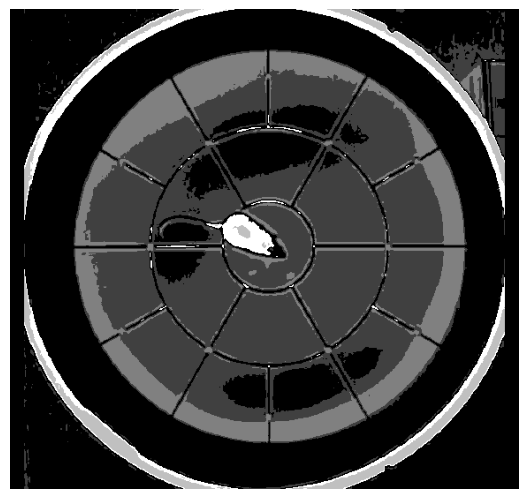

In [63]:
from sklearn.cluster import MeanShift, estimate_bandwidth

img = np.array(pic)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(pic, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
meanshift_pic = np.reshape(labels, shape[:2])

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(meanshift_pic, cmap=plt.cm.gray, aspect='equal')
plt.savefig("images/filters/8_meanshift_pic.jpg", dpi=300)

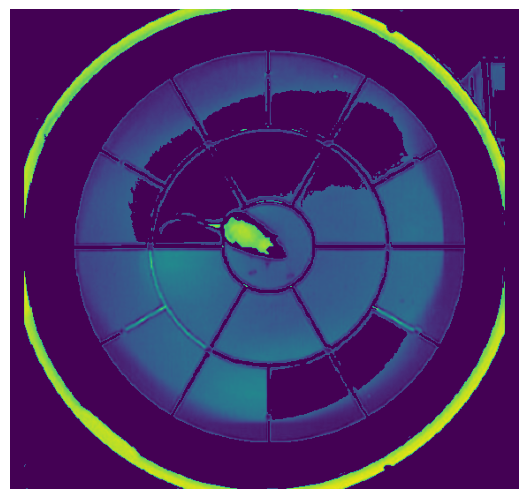

In [64]:
floodfill = pic_gray.copy()
h, w = floodfill.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

# нужно задать координаты точек - центров заливки. Без этого работать не будет!

cv2.floodFill(floodfill, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(floodfill)
plt.savefig("images/filters/9_floodfill.jpg", dpi=300)

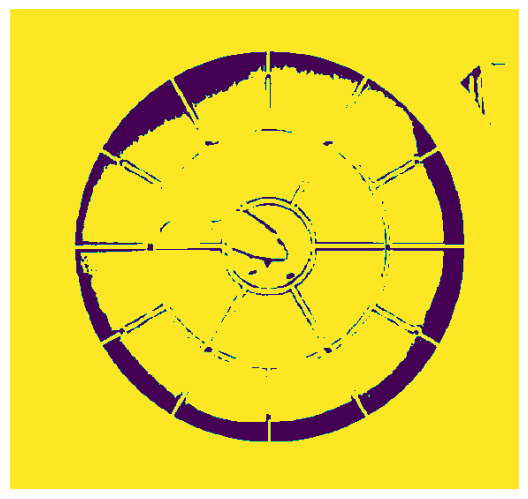

In [65]:
lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(pic_gray, lower_bound, upper_bound, cv2.THRESH_BINARY)
threshold_pic = Image.fromarray(BnW_image)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(threshold_pic)
plt.savefig("images/filters/10_threshold_pic.jpg", dpi=300)

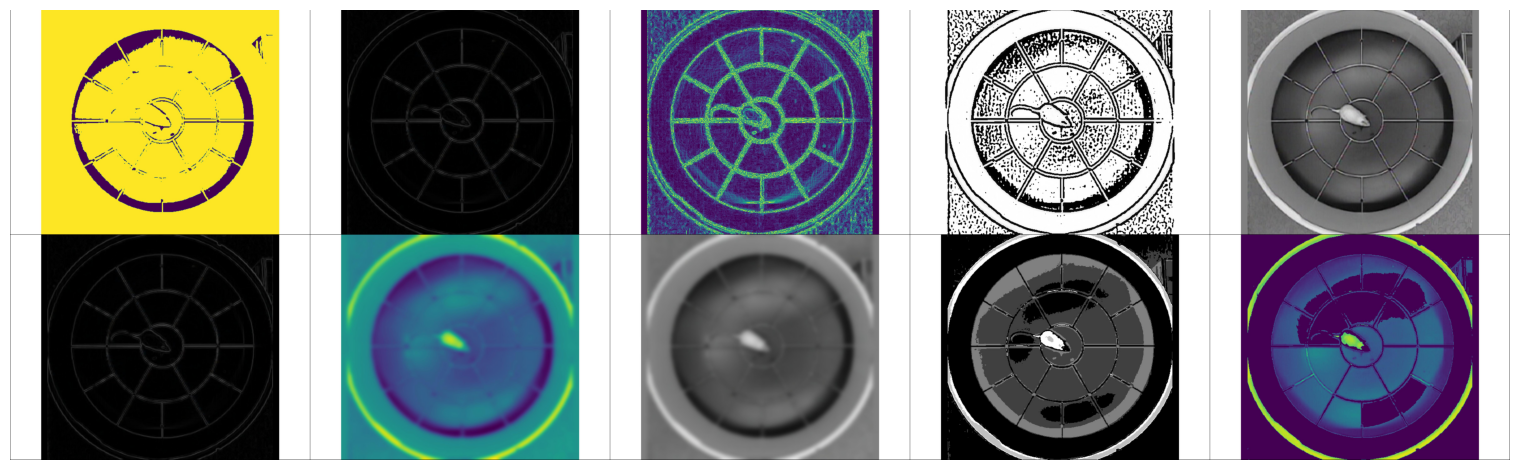

In [82]:
from torchvision.io import read_image 
from torchvision.utils import make_grid 
import glob

grid_img = []
for file in glob.glob("images/filters/*.jpg"):
    grid_img.append(read_image(file))

Grid = make_grid(grid_img, nrow=5) 

fig = plt.figure(frameon=False, figsize=(15, 6))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(Grid.permute(1, 2, 0))

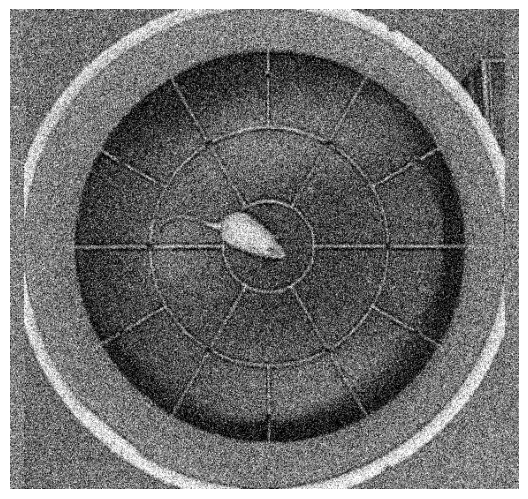

In [70]:
noise = np.random.normal(0, 50, pic_gray.shape) 
gauss_noise = pic_gray + noise
gauss_noise = np.clip(gauss_noise, 0, 255).astype(np.uint8)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(gauss_noise, cmap=plt.cm.gray)
plt.savefig("images/noise/1_gauss_noise.jpg", dpi=300)

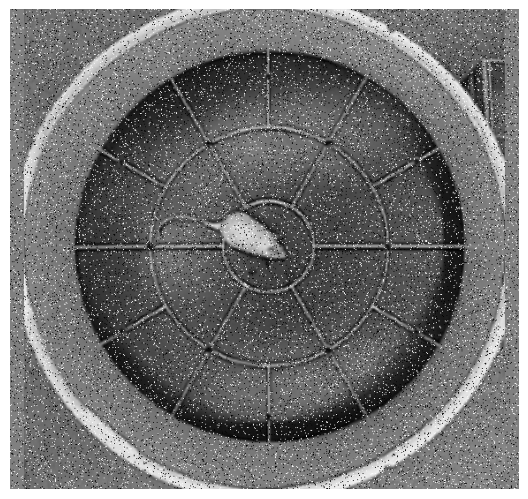

In [77]:
x = np.arange(0, 360, 1)
y = np.sin(np.deg2rad(x))

noise_sample = np.random.default_rng().uniform(0.2*min(y), 0.3*max(y), int(0.03*len(y)))
zeros = np.zeros(len(y) - len(noise_sample))
noise = np.concatenate([noise_sample, zeros])
np.random.shuffle(noise)
y_noised = y + noise

pic_gray_new = cv2.imread("/home/student1/PatternsDetection/Segmentation/20230904_segm_rat_OFT_gray_back/20230904_segm_rat_OFT_gray_back/val/images/OFT_control_01$000152&03_@004271.bmp")
pic_gray_dup = cv2.cvtColor(pic_gray_new, cv2.COLOR_BGR2GRAY)
h, w = pic_gray_dup.shape[:2]
s = 700

noise_sample = np.random.default_rng().uniform(low=200, high=250, size=s)
 
rs1 = np.random.randint(0,pic_gray_dup.size/h-1,s)
rs2 = np.random.randint(0,pic_gray_dup.size/w-1,s)

j = 0

# добавляем шум
for i in noise_sample:
    pic_gray_dup[rs2[j]][rs1[j]] += i
    j += 1

img_size = pic_gray_dup.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
img_noised = pic_gray_dup.copy()
noise = np.random.choice([pic_gray_dup.min(), pic_gray_dup.max()], noise_size)
img_noised.flat[random_indices] = noise

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray)
plt.savefig("images/noise/2_salt_n_pepper.jpg", dpi=300)

<Figure size 1200x1200 with 0 Axes>

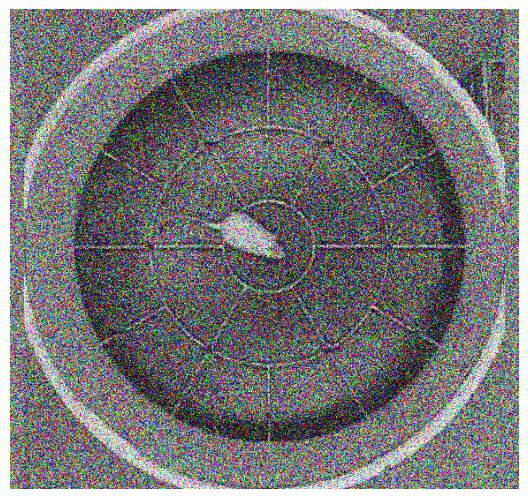

In [79]:
img = cv2.imread("/home/student1/PatternsDetection/Segmentation/20230904_segm_rat_OFT_gray_back/20230904_segm_rat_OFT_gray_back/val/images/OFT_control_01$000152&03_@004271.bmp")[...,::-1] / 255.0

noise = np.random.normal(loc=0, scale=1, size=img.shape)
noisy = np.clip((img + noise * 0.2), 0,1)
noisy2 = np.clip((img + noise * 0.4), 0,1)

plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(noisy2)
plt.savefig("images/noise/3_fast_nl_means_colored.jpg", dpi=300)

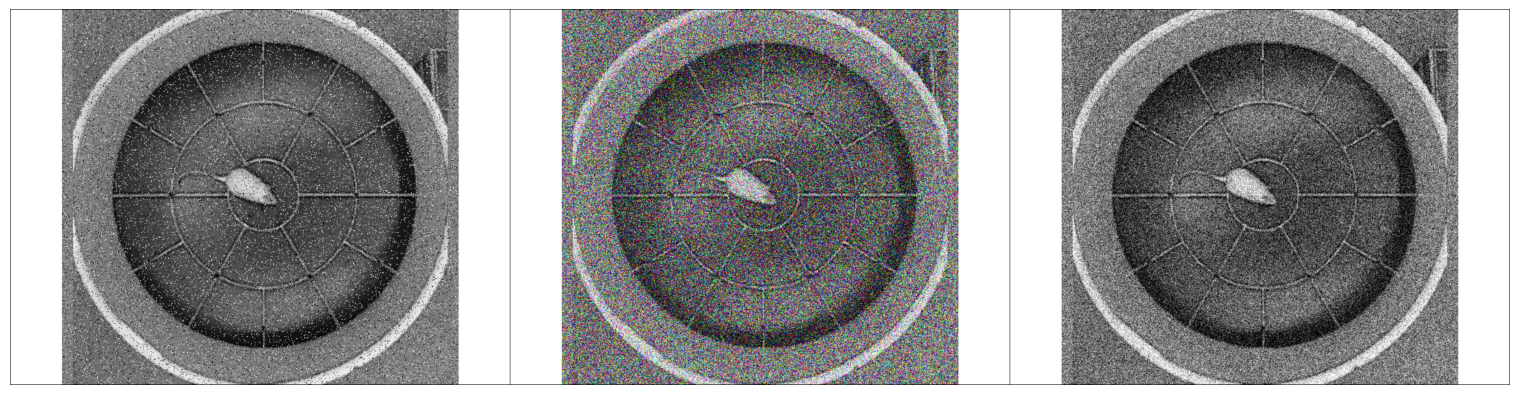

In [81]:
from torchvision.io import read_image 
from torchvision.utils import make_grid 
import glob

grid_img = []
for file in glob.glob("images/noise/*.jpg"):
    grid_img.append(read_image(file))

Grid = make_grid(grid_img, nrow=3) 

fig = plt.figure(frameon=False, figsize=(15, 6))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(Grid.permute(1, 2, 0))